In [1]:
import numpy as np
import matplotlib.pyplot as plt 
from scipy.integrate import quad
from scipy.misc import derivative

# Probability Density Function 
<p> The following script is used to plot the [probability density function], $p(x,t) = \sqrt{\frac{\beta_T}{\pi}} e^{-\beta_T \left[ x - x_0 e^{-\gamma t} \right]^2}$ such that $\beta_T = \frac{\beta_0 \beta}{\beta_0 + \beta e^{-2\gamma t}}$ and $\beta = \frac{\gamma}{2D\left[ 1-e^{-2\gamma t} \right]}$; with the [initial probability density] defined as: $ p(x_0,t=0) = \sqrt{\frac{\beta_0}{\pi}}e^{-\beta_0(x_0-x_0 e^{-\gamma t})^2} $. The plot considers various $\left< x(t=0) \right> = x_0 \in [0.0001,1]$. </p>

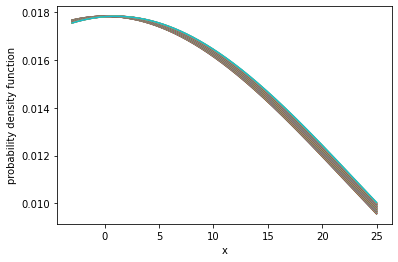

In [3]:
#define the probability density function
def pro1(x, x0, b0, D, g, t):
    s = (np.exp(-2*g*t))/(2*b0) + (D*(1-np.exp(-2*g*t)))/(g)
    bt = 1/(2*s)
    return np.sqrt(bt/np.pi)*np.exp(-bt*(x-x0*np.exp(-g*t))**2)

#initialize the constants
b0=0.001
D=1
g=1
t=0

#generate the constants for x0
list_x0=[]
val_x0 = np.linspace(0.0001, 1, 50)
for x0 in val_x0:
    list_x0.append(x0)

#x-axis values
points=1000
x_range=np.linspace(-3,25,points)

ans=np.zeros(points) #generate zeros of array for later value input

#looping to generate the result and plot the graph 
for x0 in list_x0:
    f1 = open('result_x0'+str(x0)+".txt","w")
    for j in range(0, len(x_range)):
        x=x_range[j]
        ans[j]=pro1(x, x0, b0, D, g, t)
        f1.write(str(x)+'\t\t'+str(ans[j])+'\n')
    plt.plot(x_range,ans)
    f1.close
    
plt.xlabel('x')
plt.ylabel('probability density function')
plt.show()

# Information length versus Mean ($\left< x(t=0) \right>$) when time $t=0$
Continue with the values of $\left< x(t=0) \right>$, the plot for [information length] again [mean] is shown below. To make the calculation better, the [information length] is calculated as using the following expression: 

$\mathcal{L}(t) = \int dt \ \sqrt{\frac{2(\partial_t \sigma)^2 + (\partial_t \left< x \right>)^2}{\sigma^2}} = \int dt \ \sqrt{\frac{1}{\sigma^2}\left[ 2\left( \frac{D}{\sigma}-\gamma\sigma \right)^2 +(-\gamma \left< x \right>)^2 \right]}$

$\because \frac{\partial_t \sigma}{\sigma} = \frac{\partial_t \beta}{\beta} = 2D\beta - \gamma \rightarrow \partial_t \sigma = \frac{D}{\sigma} - \gamma \sigma$

$\because \partial_t \left< x(t) \right> = -\gamma \left< x(t) \right>$

In [ ]:
#define mean function, NOTE: f1=0
def mean1(x0, g, i):
    return x0*np.exp(-g*i)

#define variance function, NOTE: f1=0
def var(i, g, b0, D):
    return (np.exp(-2*g*i))/(2*b0) + (D*(1-np.exp(-2*g*i)))/(g)

#range of time, t
points=100
t_range=np.linspace(0,6,points)

#generate zeros of array for later value input
length=np.zeros(points)
max_length=np.zeros(len(val_x0))

#looping to generate the result and plot the graph 
for x0 in range(0, len(list_x0)):
    f1=open(str(x0)+'.txt','w')
    for j in range(0,len(t_range)):
        t=t_range[j]
        length[j]=quad(lambda j: np.sqrt((2*(D/np.sqrt(var(j, g, b0, D)) - g*np.sqrt(var(j, g, b0, D)))**2 + (-g*mean1(x0, g, j))**2)/(var(j, g, b0, D))), 0, j)[0]
        f1.write(str(t)+'\t\t'+str(length[j])+'\n')
    max_length[x0]=np.max(length)
    f1.close

print(max_length)
plt.plot(list_x0, max_length)
plt.xlabel('x0')
plt.ylabel('information length')
plt.show()